In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_all = pd.read_csv('coffee_dataset.csv')
coffee_all.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


$$H_0: \mu<=70$$
$$H_1: \mu>70$$

In [2]:
sample = coffee_all.sample(150)

In [3]:
bootsamp= sample.sample(150, replace=True)

In [4]:
#boot strap
means = []
for _ in range(10):
    bootsamp = sample.sample(150, replace=True)
    means.append(bootsamp.height.mean())

In [5]:
lower, upper = np.percentile(means, 2.5), np.percentile(means, 97.5)

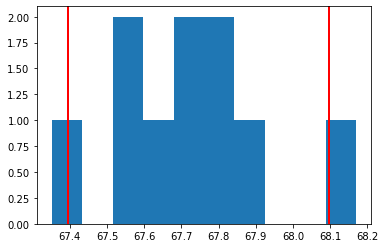

In [6]:
plt.hist(means);
plt.axvline(lower, color='red', linewidth= 2)
plt.axvline(upper, color='red', linewidth= 2);

## Simulating from the null
**assuming the null is true** then the mean would follow a normal distribution, calculting the std dev $$\sigma$$ to plot the normal graph of the means around null mean as 70. Simulate the normal dist.

In [7]:
np.std(means)

0.21021597336067308

In [8]:
#plot normal around mean with above std dev
null_vals=np.random.normal(70, np.std(means), 10000)

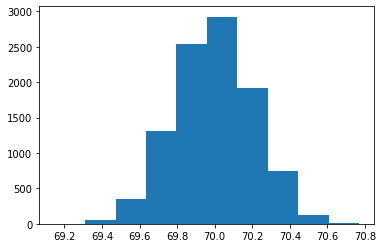

In [9]:
plt.hist(null_vals);

In [10]:
sample.height.mean()

67.63297688228066

### hypothesis testing

$$ H_0:\mu_c - \mu_n = 0$$
$$ H_1:\mu_c - \mu_n \ne 0 $$
  

$$ H_0:\mu_c - \mu_n \ge 0 $$
$$ H_1:\mu_c - \mu_n < 0 $$

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [11]:
sample_data= coffee_all.sample(200)

In [12]:
coffee_means,n_coffee_means,mean_diff=[],[],[]
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    coffee_mean = bootsamp[bootsamp.drinks_coffee==True].height.mean()
    n_coffee_mean = bootsamp[bootsamp.drinks_coffee==False].height.mean()
    #appending vals
    coffee_means.append(coffee_mean)
    n_coffee_means.append(n_coffee_mean)
    mean_diff.append(coffee_mean-n_coffee_mean)

In [13]:
np.std(coffee_means), np.std(n_coffee_means), np.std(mean_diff)

(0.2690552895281672, 0.3689156048517004, 0.45716320243824904)

In [14]:
np.mean(mean_diff)

1.6911204738163563

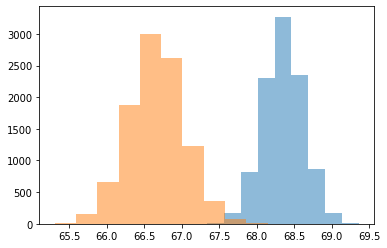

In [15]:
plt.hist(coffee_means, alpha=0.5)
plt.hist(n_coffee_means, alpha=0.5);

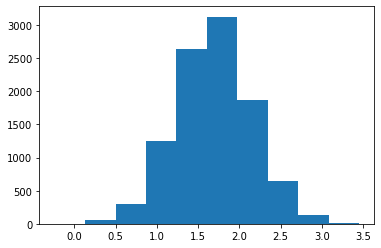

In [16]:
plt.hist(mean_diff);